# Sintorn Rotation Dataset Experiments

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
from utils.images_generator import generate_histogram
from utils.experiments_functions import get_img_info

In [3]:
images_path = f'data/Sintorn/hardware'
images_class = 'canesugar01'
rot = 'r000'
seg = 's001'


Image title: canesugar01-r000-s001


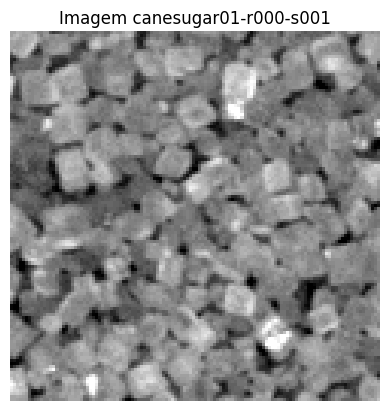

In [4]:
image_title = f'{images_class}-{rot}-{seg}'
print('Image title:',image_title)
gs_image = cv2.imread(f'{images_path}/{image_title}.png', cv2.IMREAD_GRAYSCALE)
if gs_image is not None:
    plt.imshow(gs_image, cmap='gray')
    plt.title(f"Imagem {image_title}")
    plt.axis('off')  # Remove os eixos
    plt.show()
else:
    print('error')

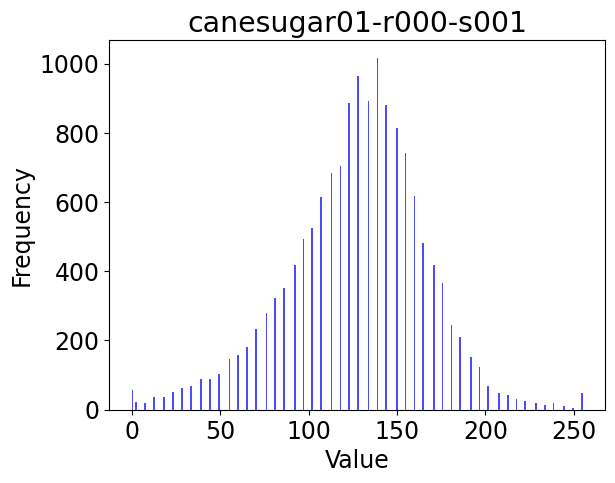

In [19]:
generate_histogram(gs_image, isNormalized=True, title=f'{image_title}')
plt.savefig(f'results/sintorn_dataset/{image_title}_histogram.png')

## Generating data for the images

In [6]:
from utils.experiments_functions import get_img_info

In [12]:
images_path = f'data/Sintorn/hardware'
images_class = 'canesugar01'
images_classes = ['couscous01','lentils01','sprinkles01','towel01']
rot = 'r000'
seg = 's001'

In [16]:
image_data_list = []
for clss in images_classes:
    image_title = f'{clss}-{rot}-{seg}'
    gs_image = cv2.imread(f'{images_path}/{image_title}.png', cv2.IMREAD_GRAYSCALE)
    image_data = get_img_info(gs_image, q_linspace = [0])
    image_data['image_name'] = clss
    image_data_list.append(image_data)

In [18]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux

,q,Smoothness,Curve structure,Weighted Entropy Correct,Weighted Complexity Correct,prob0,prob1,prob2,image_name
0,0,0.215946,0.203333,0.945994,0.069611,0.549279,0.327027,0.123694,couscous01
1,0,0.163354,0.175603,0.960452,0.050661,0.496687,0.339458,0.163855,lentils01
2,0,0.271065,0.241650,0.917611,0.105341,0.604399,0.318626,0.076976,sprinkles01
3,0,0.209731,0.203811,0.952536,0.061868,0.543064,0.330374,0.126562,towel01


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24516\2065280393.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


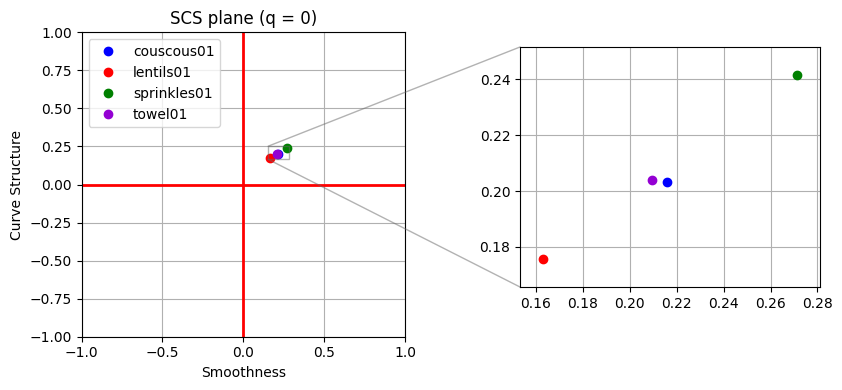

In [32]:
figname_to_color = {
    'couscous01': 'blue',
    'lentils01': 'red',
    'sprinkles01': 'green',
    'towel01': 'darkviolet'
}

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(images_classes):
    # Filter DataFrame for the current imagename
    df_data_filtered = data_default_aux[(data_default_aux['image_name'] == imageName)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    ax_main.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_data_filtered['Smoothness'], df_data_filtered['Curve structure'], 'o', c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
ax_main.set_title(f'SCS plane (q = {0})')
ax_main.set_xlabel('Smoothness')
ax_main.set_ylabel('Curve Structure')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()
ax_main.axhline(y=0, lw=2, color='r')
ax_main.axvline(x=0, lw=2, color='r')
x1, x2 = np.min(data_default_aux['Smoothness'])-0.01, np.max(data_default_aux['Smoothness'])+0.01
y1, y2 = np.min(data_default_aux['Curve structure'])-0.01, np.max(data_default_aux['Curve structure'])+0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/scs_sintorn.png', bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_24516\2225453543.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


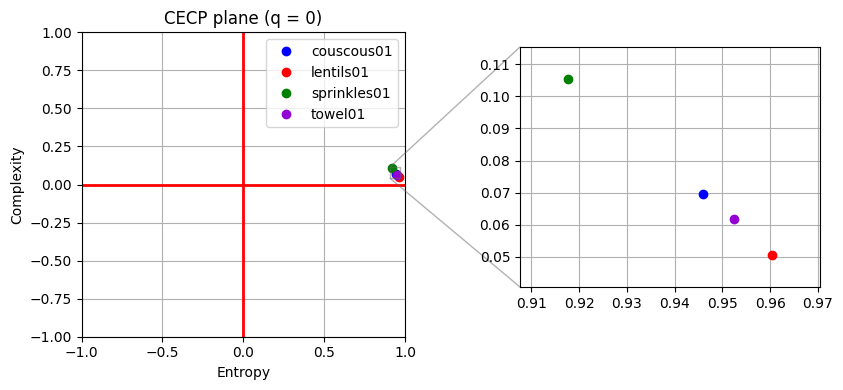

In [31]:
figname_to_color = {
    'couscous01': 'blue',
    'lentils01': 'red',
    'sprinkles01': 'green',
    'towel01': 'darkviolet'
}

fig, ax_main = plt.subplots(figsize=(5,4))
axins = plt.axes([1.05, 0.27, 0.6, 0.6])

for i, imageName in enumerate(images_classes):
    # Filter DataFrame for the current imagename
    df_data_filtered = data_default_aux[(data_default_aux['image_name'] == imageName)]
    # Create scatter plot for Smoothness vs. Curve structure, colored by q
    ax_main.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")
    axins.plot(df_data_filtered['Weighted Entropy Correct'], df_data_filtered['Weighted Complexity Correct'], 'o', c=figname_to_color[imageName], label=f"{imageName}")

# Set title and labels for the subplot
ax_main.set_title(f'CECP plane (q = {0})')
ax_main.set_xlabel('Entropy')
ax_main.set_ylabel('Complexity')
ax_main.set_xlim([-1, 1])
ax_main.set_ylim([-1, 1])
ax_main.grid(True)
ax_main.legend()
ax_main.axhline(y=0, lw=2, color='r')
ax_main.axvline(x=0, lw=2, color='r')
x1, x2 = np.min(data_default_aux['Weighted Entropy Correct'])-0.01, np.max(data_default_aux['Weighted Entropy Correct'])+0.01
y1, y2 = np.min(data_default_aux['Weighted Complexity Correct'])-0.01, np.max(data_default_aux['Weighted Complexity Correct'])+0.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True)
ax_main.indicate_inset_zoom(axins, edgecolor = '0.4')
# Adjust layout to prevent overlap
plt.tight_layout()
# Save
plt.savefig(f'results/noise_analysis/q0/cecp_sintorn.png', bbox_inches='tight')
# Show the plot
plt.show()

In [12]:
from utils.experiments_functions import get_img_info

In [15]:
image_title = 'canesugar01-r000-s001'
image_data = get_img_info(gs_image, q_linspace = np.linspace(-2, 20, num = 45))
image_data.head(5)
image_data.to_csv(f"results/sintorn_dataset/{image_title}.csv", index = False)

q = -2.0
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = -0.0; Complexity Measure = nan;
q = -1.5
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = -0.0; Complexity Measure = nan;
q = -1.0
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = -0.0; Complexity Measure = nan;
q = -0.5
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
Result: Entropy = -0.0; Complexity Measure = nan;
q = 0.0
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)
dx = 2
dy = 2
tauy = 1
taux = 1
window_shape = (2, 2)


## Generating both planes

In [16]:
image_title = 'canesugar01-r000-s001'
image_data = pd.read_csv(f"results/sintorn_dataset/{image_title}.csv")

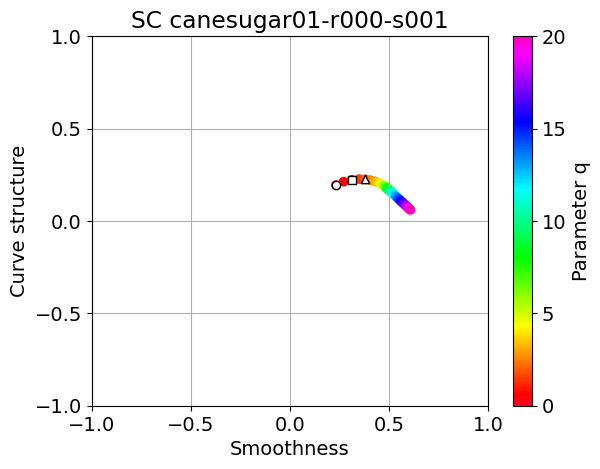

<Figure size 640x480 with 0 Axes>

In [18]:
data_ss=image_data
# SMOOTHNESS
plt.figure(1)
plt.clf() # clears the figure
plt.rcParams.update({"font.size": 14})
scatter = plt.scatter(data_ss["Smoothness"], data_ss["Curve structure"], c=data_ss['q'], cmap='gist_rainbow')
# Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
special_symbols = {0: 'o', 1: 's', 2: '^'}
for q_value, marker in special_symbols.items():
    subset = data_ss[data_ss['q'] == q_value]
    plt.scatter(subset["Smoothness"], subset["Curve structure"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')

plt.colorbar(scatter, label='Parameter q')
# plt.ylim([0, 1])
# plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid()
plt.xlabel('Smoothness')
plt.ylabel('Curve structure')
plt.title(f'SC {image_title}')

plt.savefig(f'results/sintorn_dataset/planes/{image_title}_SCplane_weighted.png')
        
# CECP
plt.figure(2)
plt.clf() # clears the figure
plt.rcParams.update({"font.size": 17})
scatter = plt.scatter(data_ss['Weighted Entropy Correct'], data_ss['Weighted Complexity Correct'], c=data_ss['q'], cmap='gist_rainbow')
# Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
special_symbols = {0: 'o', 1: 's', 2: '^'}
for q_value, marker in special_symbols.items():
    subset = data_ss[data_ss['q'] == q_value]
    plt.scatter(subset["Weighted Entropy Correct"], subset["Weighted Complexity Correct"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
plt.colorbar(scatter, label='Parameter q')
# plt.ylim([0, 1])
# plt.xlim([0, 1])
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid()
plt.xlabel('Weighted Entropy')
plt.ylabel('Weighted Complexity')
plt.title(f'CECP {image_title}')

plt.savefig(f'results/sintorn_dataset/planes/{image_title}_CECPplane_weighted.png')
plt.clf() # clears the figure

# Experiment multiple images

## Import

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
images_path = f'data/Sintorn/hardware'
images_class = 'wool01'
rot = 'r000'
seg = 's001'
images_filenames = []
for file in os.listdir(images_path):
    if file.startswith(images_class):
        images_filenames.append(file)

In [8]:
images_filenames_sample = np.random.choice(images_filenames, 20)
print(images_filenames_sample)

['wool01-r320-s066.png' 'wool01-r000-s022.png' 'wool01-r200-s007.png'
 'wool01-r320-s002.png' 'wool01-r120-s038.png' 'wool01-r320-s055.png'
 'wool01-r160-s042.png' 'wool01-r080-s006.png' 'wool01-r120-s036.png'
 'wool01-r040-s021.png' 'wool01-r160-s064.png' 'wool01-r200-s003.png'
 'wool01-r000-s014.png' 'wool01-r080-s035.png' 'wool01-r200-s074.png'
 'wool01-r040-s007.png' 'wool01-r320-s071.png' 'wool01-r080-s051.png'
 'wool01-r320-s068.png' 'wool01-r080-s017.png']


In [ ]:
'''
num = 45
num = 23
'''
from utils.experiments_functions import get_img_info
image_data_list = []
for idx, img_filename in enumerate(images_filenames):
    gs_image = cv2.imread(f'{images_path}/{img_filename}', cv2.IMREAD_GRAYSCALE)
    image_title = img_filename.split('.')[0]
    print(image_title, f"{idx}/{len(images_filenames)}")
    image_data = get_img_info(gs_image, q_linspace = np.linspace(-2, 20, num = 23))
    image_data['filename'] = img_filename
    image_data_list.append(image_data)

In [10]:
data_ss = pd.concat(image_data_list, ignore_index=True)
data_ss.to_csv(f"results/sintorn_dataset/{images_class}.csv", index = False)


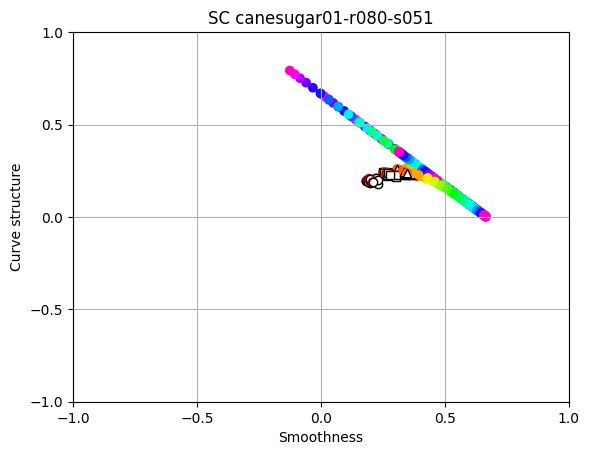

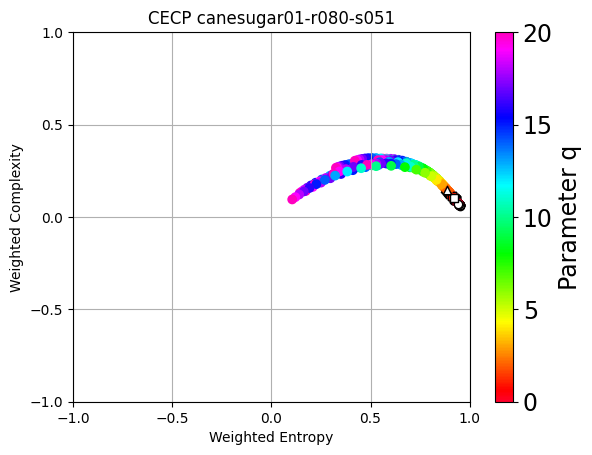

In [32]:
plt.figure(1)
plt.clf() # clears the figure
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid()
plt.xlabel('Smoothness')
plt.ylabel('Curve structure')
plt.title(f'SC {image_title}')
plt.figure(2)
plt.clf() # clears the figure
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid()
plt.xlabel('Weighted Entropy')
plt.ylabel('Weighted Complexity')
plt.title(f'CECP {image_title}')
for data_ss in image_data_list:
    # SMOOTHNESS
    plt.figure(1)
    plt.rcParams.update({"font.size": 14})
    scatter = plt.scatter(data_ss["Smoothness"], data_ss["Curve structure"], c=data_ss['q'], cmap='gist_rainbow')
    # Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
    special_symbols = {0: 'o', 1: 's', 2: '^'}
    for q_value, marker in special_symbols.items():
        subset = data_ss[data_ss['q'] == q_value]
        plt.scatter(subset["Smoothness"], subset["Curve structure"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')

    # plt.colorbar(scatter, label='Parameter q')
    # plt.ylim([0, 1])
    # plt.xlim([0, 1])

    # plt.savefig(f'results/sintorn_dataset/planes/{image_title}_SCplane_weighted.png')
            
    # CECP
    plt.figure(2)
    plt.rcParams.update({"font.size": 17})
    scatter = plt.scatter(data_ss['Weighted Entropy Correct'], data_ss['Weighted Complexity Correct'], c=data_ss['q'], cmap='gist_rainbow')
    # Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
    special_symbols = {0: 'o', 1: 's', 2: '^'}
    for q_value, marker in special_symbols.items():
        subset = data_ss[data_ss['q'] == q_value]
        plt.scatter(subset["Weighted Entropy Correct"], subset["Weighted Complexity Correct"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
    # plt.colorbar(scatter, label='Parameter q')
    # plt.ylim([0, 1])
    # plt.xlim([0, 1])

    # plt.savefig(f'results/sintorn_dataset/planes/{image_title}_CECPplane_weighted.png')
# plt.figure(1)
# plt.colorbar(scatter, label='Parameter q')
# plt.figure(2)
plt.colorbar(scatter, label='Parameter q')

Multiple images dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
images_path = f'data/Sintorn/hardware'
images_class = 'canvas01'
data_ss_all = pd.read_csv(f"results/sintorn_dataset/{images_class}.csv")
print(data_ss_all.head())

     q  Smoothness  Curve structure  Weighted Entropy Correct  \
0 -2.0         NaN         0.000000                 -0.000000   
1 -1.0         NaN         0.000000                 -0.000000   
2  0.0    0.147098         0.192132                  0.960962   
3  1.0    0.189736         0.233035                  0.937726   
4  2.0    0.228652         0.261921                  0.910571   

   Weighted Complexity Correct     prob0     prob1     prob2  \
0                          NaN       NaN  0.000000  0.000000   
1                          NaN       NaN  0.000000  0.000000   
2                     0.049154  0.480432  0.355850  0.163718   
3                     0.076621  0.523069  0.354983  0.121948   
4                     0.107376  0.561985  0.349968  0.088047   

                 filename  
0  canvas01-r000-s001.png  
1  canvas01-r000-s001.png  
2  canvas01-r000-s001.png  
3  canvas01-r000-s001.png  
4  canvas01-r000-s001.png  


In [3]:
filenames = data_ss_all.filename.unique()
print(filenames)

['canvas01-r000-s001.png' 'canvas01-r000-s002.png'
 'canvas01-r000-s003.png' 'canvas01-r000-s004.png'
 'canvas01-r000-s005.png' 'canvas01-r000-s006.png'
 'canvas01-r000-s007.png' 'canvas01-r000-s008.png'
 'canvas01-r000-s009.png' 'canvas01-r000-s010.png'
 'canvas01-r000-s011.png' 'canvas01-r000-s012.png'
 'canvas01-r000-s013.png' 'canvas01-r000-s014.png'
 'canvas01-r000-s015.png' 'canvas01-r000-s016.png'
 'canvas01-r000-s017.png' 'canvas01-r000-s018.png'
 'canvas01-r000-s019.png' 'canvas01-r000-s020.png'
 'canvas01-r000-s021.png' 'canvas01-r000-s022.png'
 'canvas01-r000-s023.png' 'canvas01-r000-s024.png'
 'canvas01-r000-s025.png' 'canvas01-r000-s026.png'
 'canvas01-r000-s027.png' 'canvas01-r000-s028.png'
 'canvas01-r000-s029.png' 'canvas01-r000-s030.png'
 'canvas01-r000-s031.png' 'canvas01-r000-s032.png'
 'canvas01-r000-s033.png' 'canvas01-r000-s034.png'
 'canvas01-r000-s035.png' 'canvas01-r000-s036.png'
 'canvas01-r000-s037.png' 'canvas01-r000-s038.png'
 'canvas01-r000-s039.png' 'canv

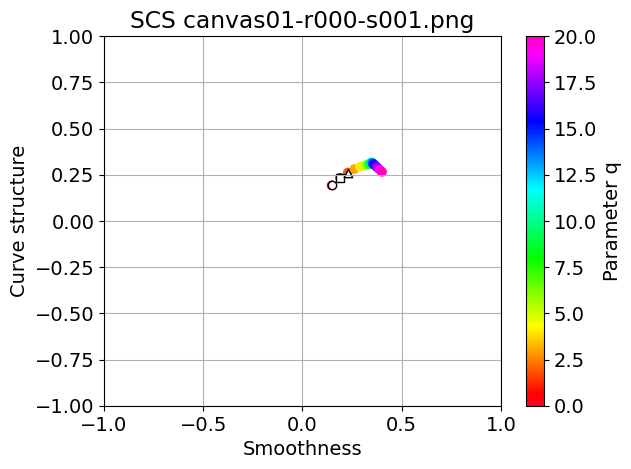

In [6]:
for i, fname in enumerate(filenames):
        data_ss = data_ss_all[data_ss_all['filename'] == fname]  # Filter data for each k
        # plt.scatter(subset['k'], subset['Smoothness'], label=f'k = {k}',
        #         color=colors[i % len(colors)], marker=markers[i % len(markers)])  # Plot x vs. y
        # plt.plot(subset['k'], subset['Smoothness'], linestyle='-', color=colors[i % len(colors)], linewidth=0.5)
        plt.figure(1)
        plt.rcParams.update({"font.size": 14})
        scatter = plt.scatter(data_ss["Smoothness"], data_ss["Curve structure"], c=data_ss['q'], cmap='gist_rainbow')
        # Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
        special_symbols = {0: 'o', 1: 's', 2: '^'}
        for q_value, marker in special_symbols.items():
                subset = data_ss[data_ss['q'] == q_value]
                plt.scatter(subset["Smoothness"], subset["Curve structure"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
                plt.ylim([-1, 1])
        plt.xlim([-1, 1])
        plt.grid(True)
        plt.xlabel('Smoothness')
        plt.ylabel('Curve structure')
        plt.title(f'SCS {fname}')
        break

#     plt.xlabel('q')  # Label for x-axis
#     plt.ylabel('Smoothness')  # Label for y-axis
#     plt.title('Plot of q vs Smoothness for each k')  # Title of the plot
#     plt.legend()  # Add a legend to distinguish the curves
#     plt.grid(True)  # Optionally add a grid for better readability
#     plt.savefig(f'temp/parameter q/colored_noise_qxSmoothness_function.png')
#     plt.clf() # clears the figure
plt.colorbar(scatter, label='Parameter q')
plt.savefig(f'results/sintorn_dataset/planes/SCS_{images_class}.png', bbox_inches='tight')
plt.show()

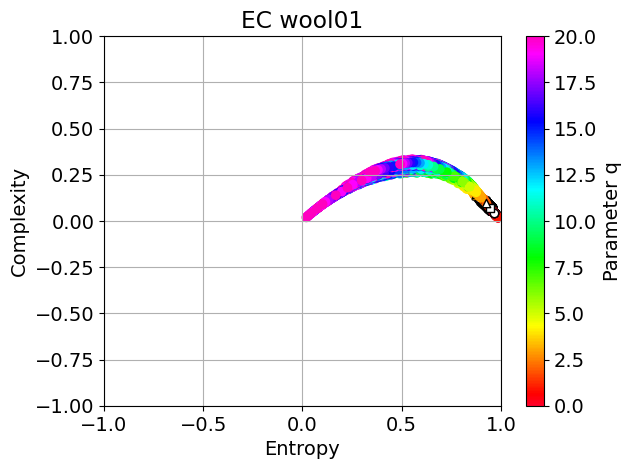

In [20]:
for i, fname in enumerate(filenames):
        data_ss = data_ss_all[data_ss_all['filename'] == fname]  # Filter data for each k
        # plt.scatter(subset['k'], subset['Smoothness'], label=f'k = {k}',
        #         color=colors[i % len(colors)], marker=markers[i % len(markers)])  # Plot x vs. y
        # plt.plot(subset['k'], subset['Smoothness'], linestyle='-', color=colors[i % len(colors)], linewidth=0.5)
        plt.figure(1)
        plt.rcParams.update({"font.size": 14})
        scatter = plt.scatter(data_ss["Weighted Entropy Correct"], data_ss["Weighted Complexity Correct"], c=data_ss['q'], cmap='gist_rainbow')
        # Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
        special_symbols = {0: 'o', 1: 's', 2: '^'}
        for q_value, marker in special_symbols.items():
                subset = data_ss[data_ss['q'] == q_value]
                plt.scatter(subset["Weighted Entropy Correct"], subset["Weighted Complexity Correct"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
                plt.ylim([-1, 1])
        plt.xlim([-1, 1])
        plt.grid(True)
        plt.xlabel('Entropy')
        plt.ylabel('Complexity')
        plt.title(f'EC {images_class}')

#     plt.xlabel('q')  # Label for x-axis
#     plt.ylabel('Smoothness')  # Label for y-axis
#     plt.title('Plot of q vs Smoothness for each k')  # Title of the plot
#     plt.legend()  # Add a legend to distinguish the curves
#     plt.grid(True)  # Optionally add a grid for better readability
#     plt.savefig(f'temp/parameter q/colored_noise_qxSmoothness_function.png')
#     plt.clf() # clears the figure
plt.colorbar(scatter, label='Parameter q')
plt.savefig(f'results/sintorn_dataset/planes/EC_{images_class}.png', bbox_inches='tight')
plt.show()

In [43]:
grouped_means = data_ss_all.groupby('q')[['Smoothness', 'Curve structure', 'Weighted Entropy Correct','Weighted Complexity Correct']].mean()
grouped_means = grouped_means.reset_index()
print(f"Filenames = {len(filenames)}")
print(f"Original = {data_ss_all.shape}\nGrouped = {grouped_means.shape}")
# Display the result
print(grouped_means.head())

Filenames = 900
Original = (20700, 9)
Grouped = (23, 5)
     q  Smoothness  Curve structure  Weighted Entropy Correct  \
0 -2.0         NaN         0.000000                  0.000000   
1 -1.0         NaN         0.000000                  0.000000   
2  0.0    0.199275         0.196095                  0.946415   
3  1.0    0.268694         0.233162                  0.924163   
4  2.0    0.330542         0.244210                  0.893270   

   Weighted Complexity Correct  
0                          NaN  
1                          NaN  
2                     0.068286  
3                     0.098422  
4                     0.137175  


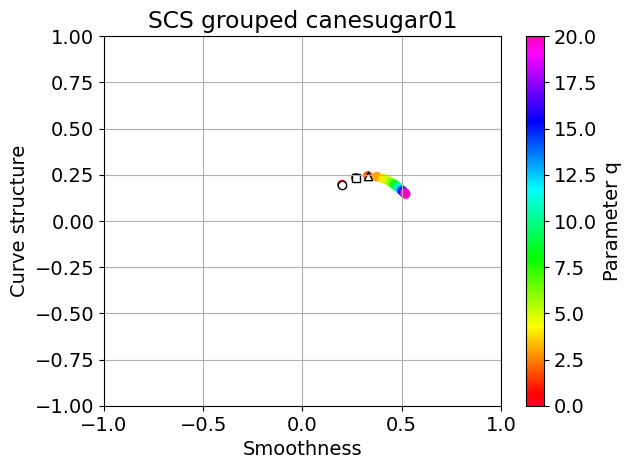

In [44]:
data_ss = grouped_means
plt.figure(1)
plt.rcParams.update({"font.size": 14})
scatter = plt.scatter(data_ss["Smoothness"], data_ss["Curve structure"], c=data_ss['q'], cmap='gist_rainbow')
# Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
special_symbols = {0: 'o', 1: 's', 2: '^'}
for q_value, marker in special_symbols.items():
        subset = data_ss[data_ss['q'] == q_value]
        plt.scatter(subset["Smoothness"], subset["Curve structure"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
        plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid(True)
plt.xlabel('Smoothness')
plt.ylabel('Curve structure')
plt.title(f'SCS grouped {images_class}')
plt.colorbar(scatter, label='Parameter q')
plt.savefig(f'results/sintorn_dataset/planes/SCS_grouped_{images_class}.png', bbox_inches='tight')
plt.show()

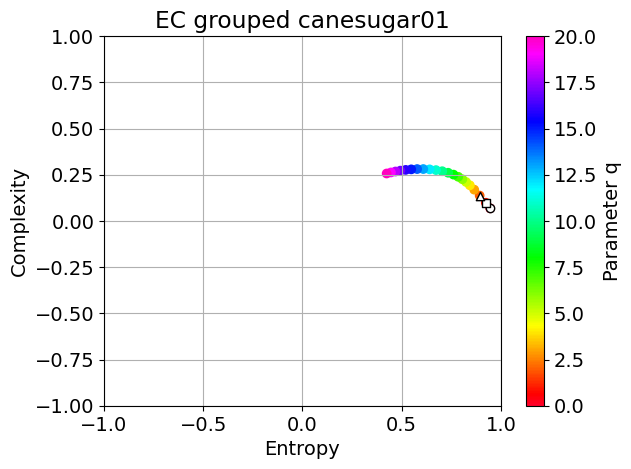

In [45]:
data_ss = grouped_means
plt.figure(2)
plt.rcParams.update({"font.size": 14})
scatter = plt.scatter(data_ss["Weighted Entropy Correct"], data_ss["Weighted Complexity Correct"], c=data_ss['q'], cmap='gist_rainbow')
# Overlay special symbols for points where data_ss['q'] is 0, 1, or 2
special_symbols = {0: 'o', 1: 's', 2: '^'}
for q_value, marker in special_symbols.items():
        subset = data_ss[data_ss['q'] == q_value]
        plt.scatter(subset["Weighted Entropy Correct"], subset["Weighted Complexity Correct"], c='white', edgecolors='black', marker=marker, label=f'q={q_value}')
        plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.grid(True)
plt.xlabel('Entropy')
plt.ylabel('Complexity')
plt.title(f'EC grouped {images_class}')

#     plt.xlabel('q')  # Label for x-axis
#     plt.ylabel('Smoothness')  # Label for y-axis
#     plt.title('Plot of q vs Smoothness for each k')  # Title of the plot
#     plt.legend()  # Add a legend to distinguish the curves
#     plt.grid(True)  # Optionally add a grid for better readability
#     plt.savefig(f'temp/parameter q/colored_noise_qxSmoothness_function.png')
#     plt.clf() # clears the figure
plt.colorbar(scatter, label='Parameter q')
plt.savefig(f'results/sintorn_dataset/planes/EC_grouped_{images_class}.png', bbox_inches='tight')
plt.show()